# PREDICT A PULSAR STAR
## Classification

### Load Data

In [1]:
import os
import pandas as pd

DATA_PATH = '../DATA/'
FILE_NAME = 'pulsar_stars.csv'
def load_data(data_path=DATA_PATH, file_name=FILE_NAME):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

dataset = load_data()

### View Data and Informations

In [2]:
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
not_pulsar, pulsar = dataset['target_class'].value_counts()

print("Pulsar Star:\t ", pulsar,"\nNot Pulsar Star: ", not_pulsar)

Pulsar Star:	  1639 
Not Pulsar Star:  16259


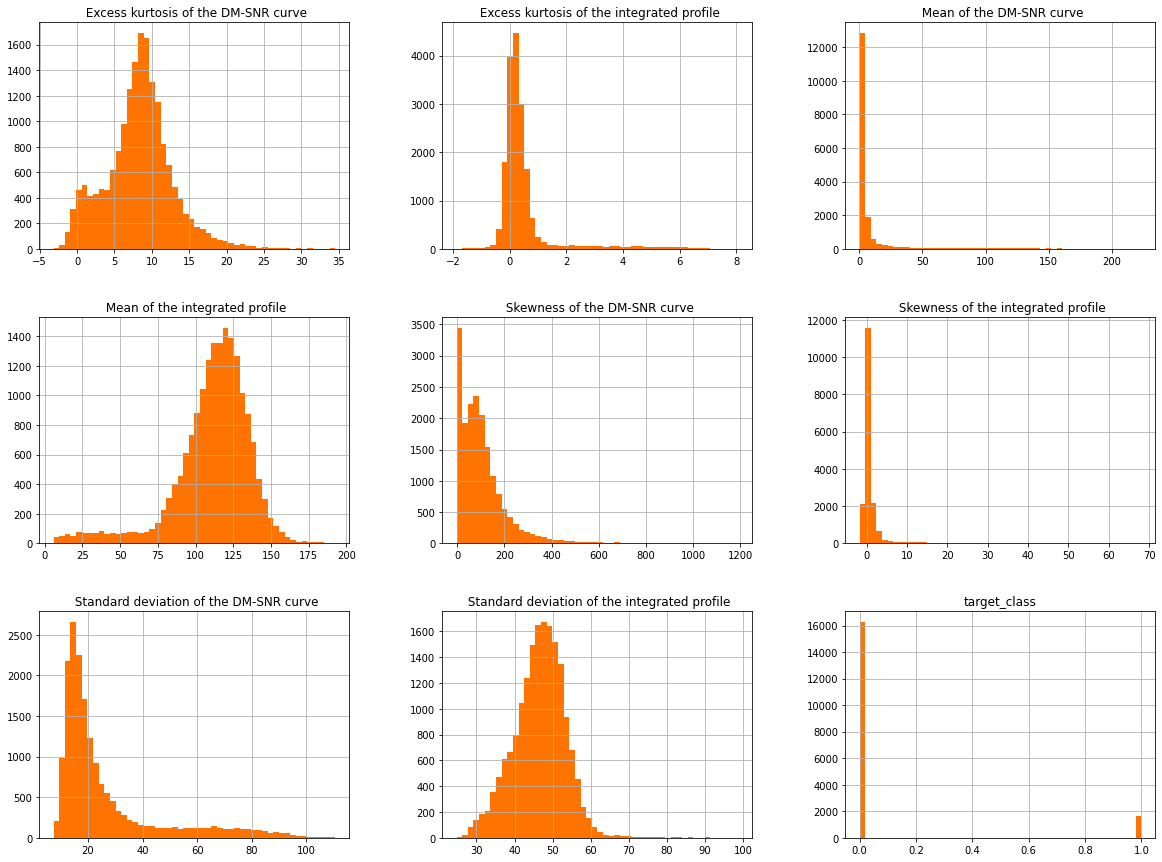

In [5]:
import matplotlib.pyplot as plt

custom_color = '#ff7400'
dataset.hist(bins=50, figsize=(20,15), color=custom_color)
plt.show()

### Split Dataset

#### Get the Labels

In [6]:
X, y =  dataset.drop('target_class', axis=1), dataset['target_class'].copy()

print("X:",X.shape,"\ny:",y.shape)

X: (17898, 8) 
y: (17898,)


#### Train Set and Test Set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("80% - X_train size:", X_train.shape[0], " y_train size:", y_train.shape[0])
print("20% - X_test size:  ", X_test.shape[0], " y_test size:\t ", y_test.shape[0])

80% - X_train size: 14318  y_train size: 14318
20% - X_test size:   3580  y_test size:	  3580


### Prepare the Data

#### Data Transformations

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attr_pipeline = Pipeline([
                        ('std_scaler', StandardScaler())
                    ])
cols = list(X)
pipeline = ColumnTransformer([
                ('num_attr_pipeline', num_attr_pipeline, cols)
            ])

X_train_prepared = pipeline.fit_transform(X_train)

## Training

### Classifier: Stocastic Gradient Descend

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
# trying a prediction
pulsar_star = 42
single_prediction_sgd = sgd_clf.predict([X.iloc[pulsar_star]])

print("Expected value: ",[y[pulsar_star]],"\nPredicted value:", single_prediction_sgd)

Expected value:  [1] 
Predicted value: [0]


### SGD Performance Measures

#### SGD - Cross-Validation

In [11]:
from sklearn.model_selection import cross_val_score

K = 3
scores_sgd = cross_val_score(sgd_clf, X_train_prepared, y_train, cv=K, scoring="accuracy")

print("Accuracy:", round(scores_sgd.mean(),4))

Accuracy: 0.9787


#### SGD - Confusion Matrix

In [12]:
import seaborn as sns

#Function for drawing confusion matrix
def draw_confusion_matrix(cm, title = 'Confusion Matrix', color = custom_color):
    palette = sns.light_palette(color, as_cmap=True)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d', cmap=palette)
    # labels
    ax.set_title('\n' + title + '\n', fontweight='bold')
    ax.set_xlabel('Predicted', fontweight='bold')
    ax.set_ylabel('Actual', fontweight='bold');
    ax.xaxis.set_ticklabels(['Not Pulsar', 'Pulsar Star'], ha = 'center')
    ax.yaxis.set_ticklabels(['Not Pulsar', 'Pulsar Star'], va = 'center')
    

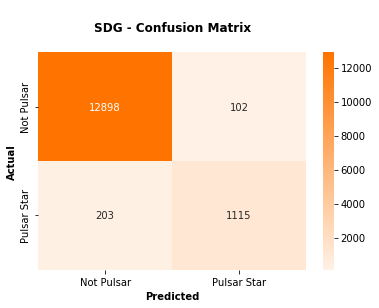

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred_sgd = cross_val_predict(sgd_clf, X_train_prepared, y_train, cv=K)

cm_sgd = confusion_matrix(y_train, y_train_pred_sgd)

draw_confusion_matrix(cm_sgd, 'SDG - Confusion Matrix')

#### SGD - Precision and Recall

In [14]:
from sklearn.metrics import precision_score, recall_score

precision_sgd = precision_score(y_train, y_train_pred_sgd)
recall_sgd = recall_score(y_train, y_train_pred_sgd)

print('Precision:', round(precision_sgd,4), '\nRecall:   ', round(recall_sgd,4))

Precision: 0.9162 
Recall:    0.846


In [15]:
from sklearn.metrics import f1_score

f1_score_sgd = f1_score(y_train, y_train_pred_sgd)

print('F1-Score:', round(f1_score_sgd,4))

F1-Score: 0.8797


In [16]:
#Function for plotting precision and recall
def plot_precison_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, custom_color)
    plt.title('Precision vs Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

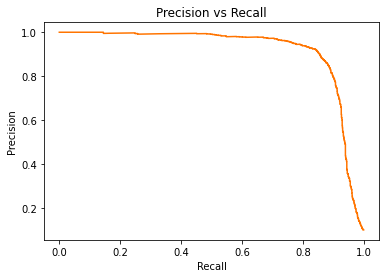

In [17]:
from sklearn.metrics import precision_recall_curve

# decision scores
y_scores_sgd = cross_val_predict(sgd_clf, X_train_prepared, y_train, cv=K, method="decision_function")

precisions_sgd, recalls_sgd, _ = precision_recall_curve(y_train, y_scores_sgd)
  
plot_precison_vs_recall(precisions_sgd, recalls_sgd)

#### SGD - ROC Curve

In [18]:
#Function for plotting the ROC curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, custom_color, label='Area: %0.3f' %roc_auc, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate - Recall')
    plt.legend(loc='lower right')
    plt.show()

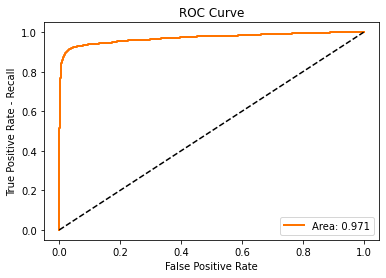

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_sgd, tpr_sgd, _ = roc_curve(y_train, y_scores_sgd)
roc_auc_sgd = roc_auc_score(y_train, y_scores_sgd)

plot_roc_curve(fpr_sgd, tpr_sgd, roc_auc_sgd)

### Classifier: K-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_prepared, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
# trying a prediction
single_prediction_knn = knn_clf.predict([X.iloc[pulsar_star]])

print("Expected value: ",[y[pulsar_star]],"\nPredicted value:", single_prediction_knn)

Expected value:  [1] 
Predicted value: [0]


### KNN Performance Measures

#### KNN - Cross-Validation

In [22]:
scores_knn = cross_val_score(knn_clf, X_train_prepared, y_train, cv=K, scoring="accuracy")

print("Accuracy:", round(scores_knn.mean(),4))

Accuracy: 0.9785


#### KNN - Confusion Matrix

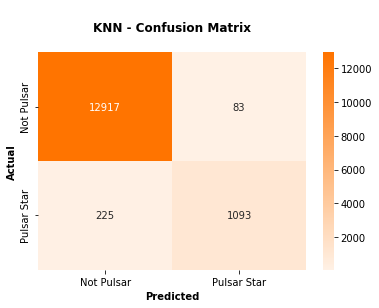

In [23]:
y_train_pred_knn = cross_val_predict(knn_clf, X_train_prepared, y_train, cv=K)

cm_knn = confusion_matrix(y_train, y_train_pred_knn)

draw_confusion_matrix(cm_knn, 'KNN - Confusion Matrix')

#### KNN - Precision and Recall

In [24]:
precision_knn = precision_score(y_train, y_train_pred_knn)
recall_knn = recall_score(y_train, y_train_pred_knn)

print('Precision:', round(precision_knn,4), '\nRecall:   ', round(recall_knn,4))

Precision: 0.9294 
Recall:    0.8293


In [25]:
f1_score_knn = f1_score(y_train, y_train_pred_knn)

print('F1-Score:', round(f1_score_knn,4))

F1-Score: 0.8765


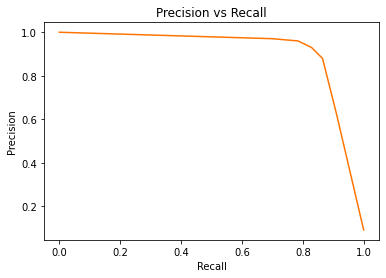

In [26]:
# decision scores
y_probas_knn = cross_val_predict(knn_clf, X_train_prepared, y_train, cv=K, method="predict_proba")
y_scores_knn = y_probas_knn[:,1]

precisions_knn, recalls_knn, _ = precision_recall_curve(y_train, y_scores_knn)
    
plot_precison_vs_recall(precisions_knn, recalls_knn)

#### KNN - ROC Curve

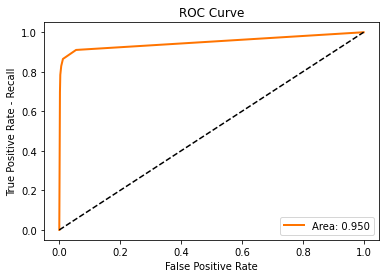

In [27]:
fpr_knn, tpr_knn, _ = roc_curve(y_train, y_scores_knn)
roc_auc_knn = roc_auc_score(y_train, y_scores_knn)

plot_roc_curve(fpr_knn, tpr_knn, roc_auc_knn)

### Classifier: Support Vector Machine

In [28]:
from sklearn.svm import SVC

svm_poly_clf = SVC(kernel="poly", degree=3, coef0=10, C=5, random_state=42)
svm_poly_clf.fit(X_train_prepared, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=10,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [29]:
# trying a prediction
single_prediction_svm_poly = svm_poly_clf.predict([X.iloc[pulsar_star]])

print("Expected value: ",[y[pulsar_star]],"\nPredicted value:", single_prediction_svm_poly)

Expected value:  [1] 
Predicted value: [0]


### SVM Performance Measures

#### SVM - Cross-Validation

In [30]:
scores_svm_poly = cross_val_score(svm_poly_clf, X_train_prepared, y_train, cv=K, scoring="accuracy")

print("Accuracy:", round(scores_svm_poly.mean(),4))

Accuracy: 0.9794


#### SVM - Confusion Matrix

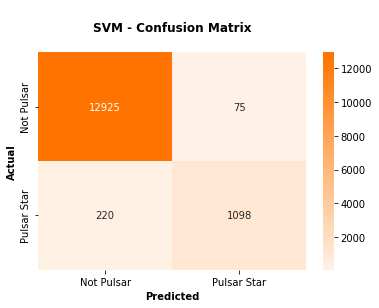

In [31]:
y_train_pred_svm_poly = cross_val_predict(svm_poly_clf, X_train_prepared, y_train, cv=K)

cm_svm = confusion_matrix(y_train, y_train_pred_svm_poly)

draw_confusion_matrix(cm_svm, 'SVM - Confusion Matrix')

#### SVM - Precision and Recall

In [32]:
precision_svm_poly = precision_score(y_train, y_train_pred_svm_poly)
recall_svm_poly = recall_score(y_train, y_train_pred_svm_poly)

print('Precision:', round(precision_svm_poly,4), '\nRecall:   ', round(recall_svm_poly,4))

Precision: 0.9361 
Recall:    0.8331


In [33]:
f1_score_svm_poly = f1_score(y_train, y_train_pred_svm_poly)

print('F1-Score:', round(f1_score_svm_poly,4))

F1-Score: 0.8816


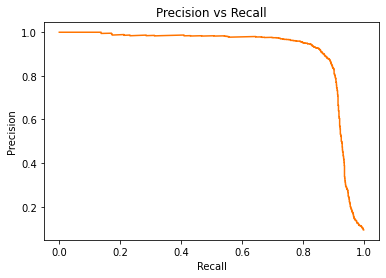

In [34]:
# decision scores
y_scores_svm_poly = cross_val_predict(svm_poly_clf, X_train_prepared, y_train, cv=K, method="decision_function")

precisions_svm_poly, recalls_svm_poly, _ = precision_recall_curve(y_train, y_scores_svm_poly)
    
plot_precison_vs_recall(precisions_svm_poly, recalls_svm_poly)

#### SVM - ROC Curve

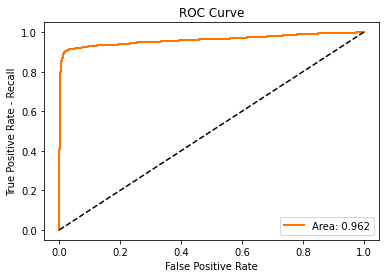

In [35]:
fpr_svm_poly, tpr_svm_poly, _ = roc_curve(y_train, y_scores_svm_poly)
roc_auc_svm_poly = roc_auc_score(y_train, y_scores_svm_poly)

plot_roc_curve(fpr_svm_poly, tpr_svm_poly, roc_auc_svm_poly)

### Classifier: Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)

# Decision Trees don't require feature scaling
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [37]:
# trying a prediction
single_prediction_dt = dt_clf.predict([X.iloc[pulsar_star]])

print("Expected value: ",[y[pulsar_star]],"\nPredicted value:", single_prediction_dt)

Expected value:  [1] 
Predicted value: [0]


### DT Performance Measures

#### DT - Cross-Validation

In [38]:
scores_dt = cross_val_score(dt_clf, X_train, y_train, cv=K, scoring="accuracy")

print("Accuracy:", round(scores_dt.mean(),4))

Accuracy: 0.967


#### DT - Confusion Matrix

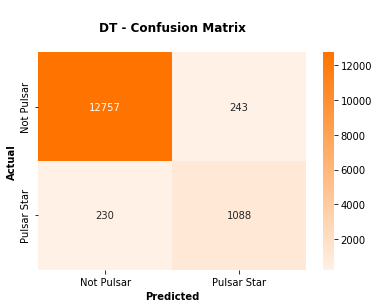

In [39]:
y_train_pred_dt = cross_val_predict(dt_clf, X_train, y_train, cv=K)

cm_dt = confusion_matrix(y_train, y_train_pred_dt)

draw_confusion_matrix(cm_dt, 'DT - Confusion Matrix')

#### DT - Precision and Recall

In [40]:
precision_dt = precision_score(y_train, y_train_pred_dt)
recall_dt = recall_score(y_train, y_train_pred_dt)

print('Precision:', round(precision_dt,4), '\nRecall:   ', round(recall_dt,4))

Precision: 0.8174 
Recall:    0.8255


In [41]:
f1_score_dt = f1_score(y_train, y_train_pred_dt)

print('F1-Score:', round(f1_score_dt,4))

F1-Score: 0.8214


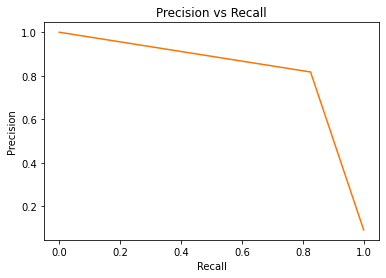

In [42]:
# predict probabilities
y_probas_dt = cross_val_predict(dt_clf, X_train, y_train, cv=K, method="predict_proba")
# decision scores
y_scores_dt = y_probas_dt[:,1]

precisions_dt, recalls_dt, _ = precision_recall_curve(y_train, y_scores_dt)
    
plot_precison_vs_recall(precisions_dt, recalls_dt)

#### DT - ROC Curve

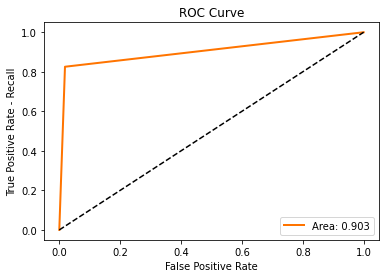

In [43]:
fpr_dt, tpr_dt, _ = roc_curve(y_train, y_scores_dt)
roc_auc_dt = roc_auc_score(y_train, y_scores_dt)

plot_roc_curve(fpr_dt, tpr_dt, roc_auc_dt)

### Fine-Tune Models

#### Grid Search - Parameters

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
sgd_param_grid = [{
    'loss':['hinge', 'squared_hinge', 'perceptron'],
    'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty':['l2','l1','elasticnet'],
    'l1_ratio':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'early_stopping':[True],
    'shuffle':[True,False],
    'random_state': [42]
}]

In [46]:
knn_param_grid = [{
    'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights':['uniform', 'distance'],
    'metric':['minkowski'],
    'p':[1.0, 1.5, 2.0, 2.5, 3.0, 3.5] 
}]

In [47]:
svm_param_grid = [{
    'C': [10, 15, 20],
    'coef0':[0, 10, 100],
    'kernel': ['poly'],
    'random_state': [42]
}]

In [48]:
dt_param_grid = [{
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth':range(2,20,2),
    'max_leaf_nodes': list(range(2, 100, 10)),
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42]
}]

#### Grid Search

In [49]:
models = {
    'sgd': SGDClassifier(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(),
    'dt' : DecisionTreeClassifier()
}

params = {
    'sgd': sgd_param_grid,
    'knn': knn_param_grid,
    'svm': svm_param_grid,
    'dt' : dt_param_grid
}

grid_searches = {}
for key in models:
    model = models[key]
    param_grid = params[key]
    
    grid_search = GridSearchCV(model, param_grid, cv=K, scoring='f1')
    if key != 'dt':
        grid_search.fit(X_train_prepared, y_train)
    else:
        grid_search.fit(X_train, y_train)
    grid_searches[key] = grid_search

### Select  the Best Model

In [50]:
model_scores = {}
for key in grid_searches:
    cv_res = grid_searches[key].cv_results_
    score = max(cv_res['mean_test_score'])
    model_scores[key] = score

    print(key + ' f1-score:', round(model_scores[key],4))

sgd f1-score: 0.8865
knn f1-score: 0.8822
svm f1-score: 0.8836
dt f1-score: 0.8841


In [51]:
key_final_model = max(model_scores, key=model_scores.get)

final_model = grid_searches[key_final_model].best_estimator_

final_model

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.0, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Save/Load Model

In [52]:
import joblib

model = final_model
model_name = key_final_model + '_model.pkl'

# Save Model
joblib.dump(model, '../SavedModels/' + model_name)

# Load Model
# final_model = joblib.load('../SavedModels/' + model_name)


['../SavedModels/sgd_model.pkl']

### Evaluate the Best Model on Test Set

In [53]:
X_test_prepared = pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_recall = recall_score(y_test, final_predictions)
final_precision = precision_score(y_test, final_predictions)
final_f1_score = f1_score(y_test, final_predictions)

print('Precision:',   round(final_precision,4),
      '\nRecall:   ', round(final_recall,4))
print('F1-Score: ',   round(final_f1_score,4))

Precision: 0.9517 
Recall:    0.7975
F1-Score:  0.8678


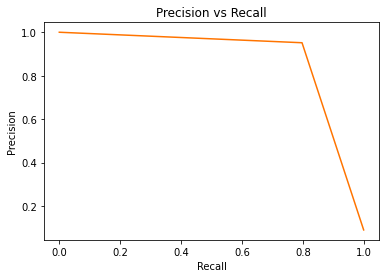

In [54]:
precisions, recalls, _ = precision_recall_curve(y_test, final_predictions)
 
plot_precison_vs_recall(precisions, recalls)

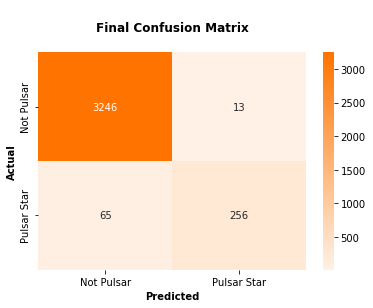

In [55]:
final_cm = confusion_matrix(y_test, final_predictions)

draw_confusion_matrix(final_cm, 'Final Confusion Matrix')

In [56]:
# trying a prediction
single_prediction = final_model.predict([X.iloc[pulsar_star]])

print("Expected value: ",[y[pulsar_star]],"\nPredicted value:", single_prediction)

Expected value:  [1] 
Predicted value: [1]
